In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("song_data.csv")

In [4]:
df.head(10)

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   
5            Bring Me To Life               80            235893   
6                 Last Resort               81            199893   
7    Are You Gonna Be My Girl               76            213800   
8              Mr. Brightside               80            222586   
9                 Sex on Fire               81            203346   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   
5      0.008950         0.316   0.945          0.000002    4    0.3960   
6      0.000504         0.581   0.887          0.001110    4    0.2680   
7      0.001480         0.613   0.953          0.000582    2    0.1520   
8      0.001080         0.330   0.936          0.000000    1    0.0926   
9      0.001720         0.542   0.905          0.010400    9    0.1360   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574  
5    -3.169           0       0.1240  189.931               4          0.320  
6    -3.659           0       0.0624   90.578               4          0.724  
7    -3.435           1       0.0855  105.046               4          0.537  
8    -3.660           1       0.0917  148.112               4          0.234  
9    -5.653           1       0.0540  153.398               4          0.374

In [5]:
df = df.drop(columns='song_name')

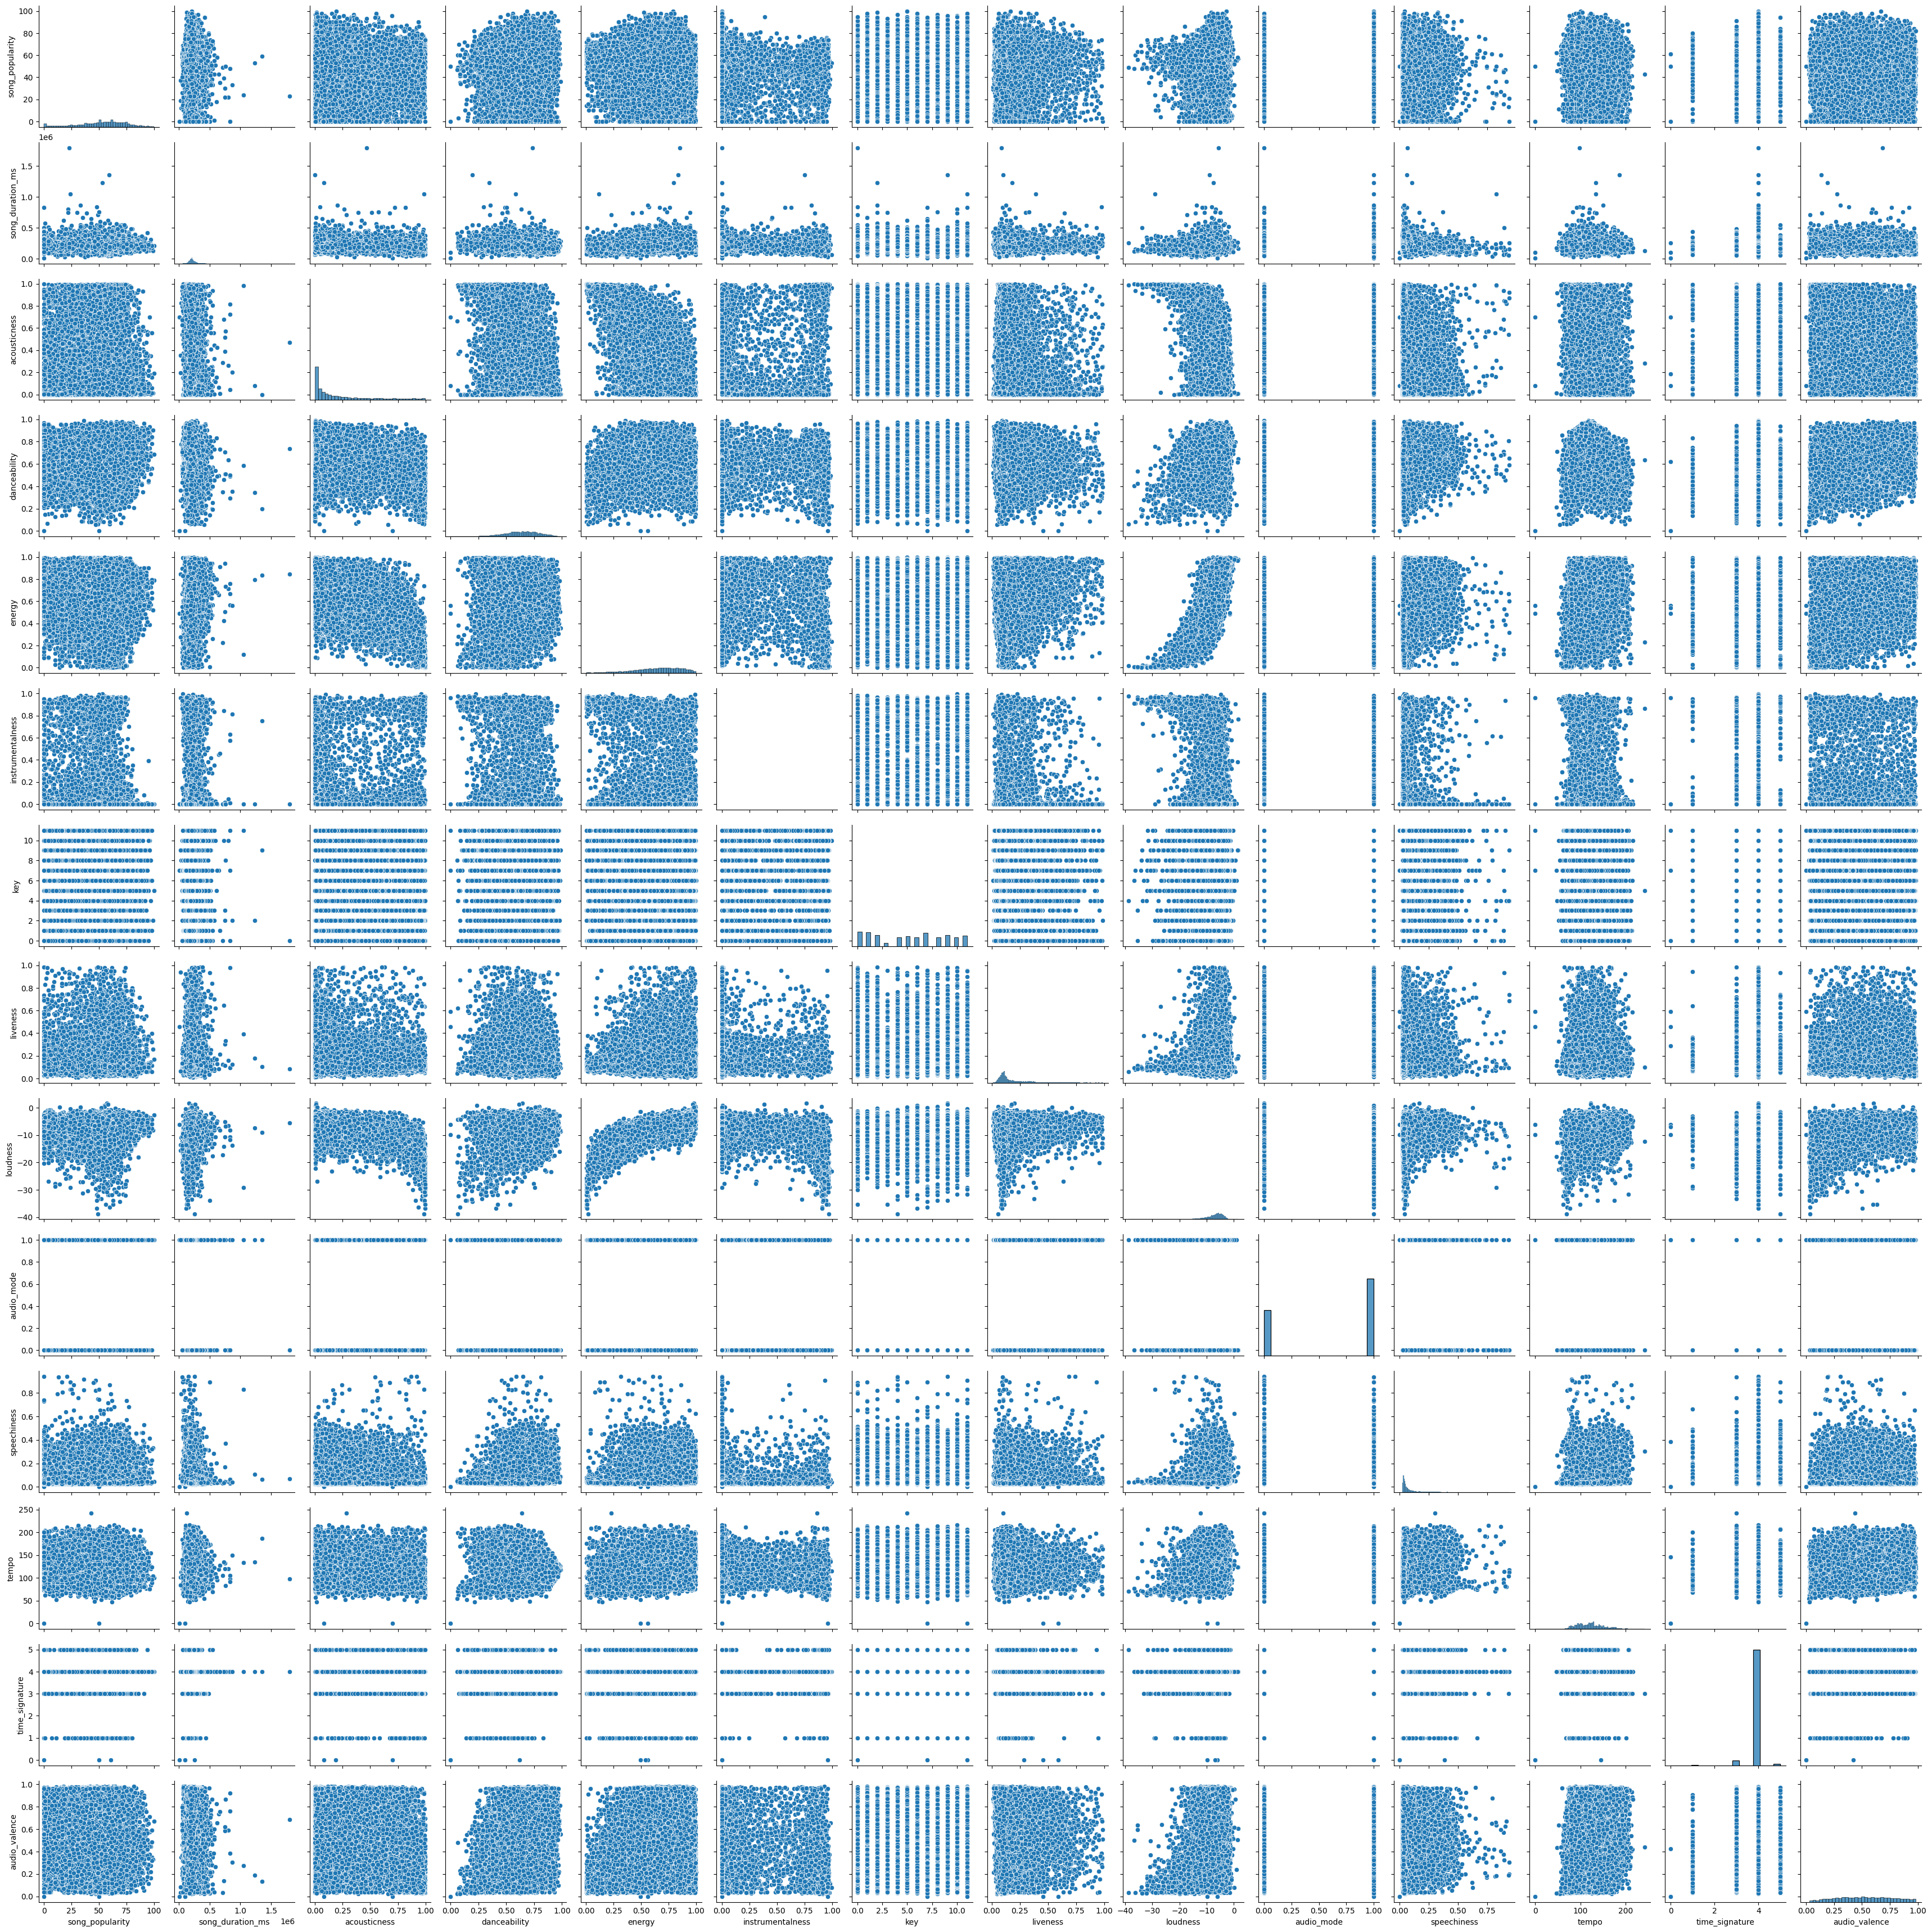

In [6]:
sns.pairplot(df)

In [7]:
X = df.drop(columns='song_popularity')
Y = df['song_popularity']

In [9]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, train_size=.8, random_state=13)

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Linear Regression mse:', mse)
print('Linear Regression mae:', mae)

Lin Regression mse: 455.7275706232377
Lin Regression mae: 16.940679511279917


In [12]:
alphas = np.logspace(-3, 3, 10)
lasso = LassoCV(alphas=alphas)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Lasso mse:', mse)
print('Lasso mae:', mae)
print(lasso.alpha_)

Lasso mse: 455.7417599464956
Lasso mae: 16.941562605253615
0.001


In [13]:
ridge = RidgeCV(alphas=alphas)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Ridge mse:', mse)
print('Ridge mae:', mae)
print(ridge.alpha_)

Ridge mse: 455.76541027660306
Ridge mae: 16.942519214406317
2.154434690031882


In [14]:
elastic = ElasticNet()
elastic.fit(x_train, y_train)
y_pred = elastic.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Elastic mse:', mse)
print('Elastic mae:', mae)

Elastic mse: 478.15969065550587
Elastic mae: 17.34160650340143


In [15]:
bayes_ridge = BayesianRidge()
bayes_ridge.fit(x_train, y_train)
y_pred = bayes_ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Bayesian ridge mse:', mse)
print('Bayeian ridge mae:', mae)
print(bayes_ridge.alpha_)
print(bayes_ridge.lambda_)
print(bayes_ridge.coef_)

Bayesian ridge mse: 455.82244039943515
Bayeian ridge mae: 16.94475580054807
0.0021802931464545276
0.010189126609652219
[ -8.73853196  -4.36922907  12.06085261 -10.74738942 -10.62800019
  -1.03169757  -3.84849278  24.95459697   0.18650996  -1.3846938
  -2.47423326   5.78550063  -8.65502394]
